<a href="https://colab.research.google.com/github/clauccg0507/Casos_de_estudio/blob/main/Tarea_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

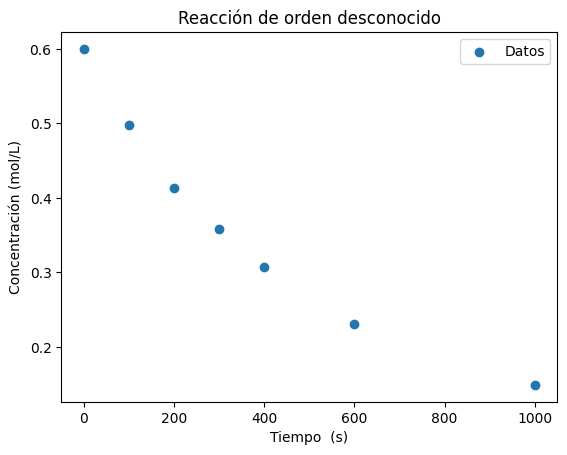

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Datos
t=np.array([0, 100, 200, 300, 400, 600, 1000])
AA_0=np.array([1, 0.829, 0.688, 0.597, 0.511, 0.385, 0.248])
A=np.array(0.6*AA_0)

#Graficación
plt.scatter(t, A, label='Datos')
plt.xlabel('Tiempo  (s)')
plt.ylabel('Concentración (mol/L)')
plt.title('Reacción de orden desconocido')
plt.legend()
plt.show()

Resultados del ajuste: [-0.0013855  -0.58157704]


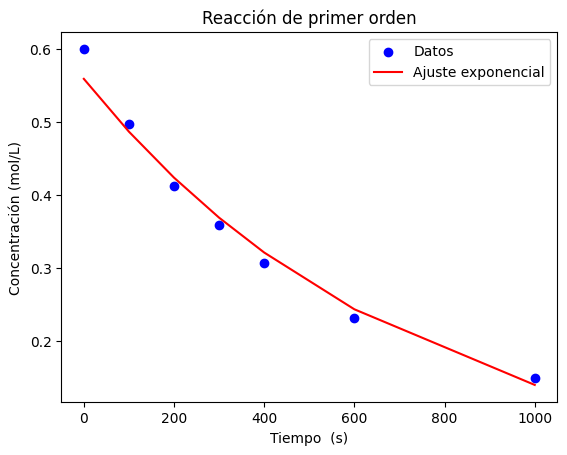

La constante de velocidad de la reacción química de primer orden es -0.001


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

#Datos
t=np.array([0, 100, 200, 300, 400, 600, 1000])
AA_0=np.array([1, 0.829, 0.688, 0.597, 0.511, 0.385, 0.248])
A=np.array(0.6*AA_0)

#Modelo de regresión
fit=np.polyfit(t, np.log(A), 1)
print(f"Resultados del ajuste: {fit}")

#Ecuación de regresión
ecuacion=(math.e**-0.58157704)*(math.e**(-0.0013855*t))

#Graficación
plt.scatter(t, A, label='Datos', color='b')
plt.plot(t, ecuacion, label='Ajuste exponencial', color='r')
plt.xlabel('Tiempo  (s)')
plt.ylabel('Concentración (mol/L)')
plt.title('Reacción de primer orden')
plt.legend()
plt.show()

print("La constante de velocidad de la reacción química de primer orden es -0.001")

In [ ]:
import sympy
from sympy import *
from sympy import symbols, Eq, diff
import math
import matplotlib.pyplot as plt

t=symbols('t')
T=Function('T')
k=symbols('k')
T_m=70

#Definición de la ecuación diferencial
ecuacion_dif=Eq(diff(T(t), t, 1), k*(T(t)-T_m))
ecuacion_dif

Eq(Derivative(T(t), t), k*(T(t) - 70))

In [ ]:
#Resolución de la ecuación diferencial
dsolve(ecuacion_dif)

Eq(T(t), C1*exp(k*t) + 70)

In [ ]:
#Evaluar en la condición inicial T(0)=300ºF
dsolve(ecuacion_dif, ics={T(0):300})

Eq(T(t), 230*exp(k*t) + 70)

In [ ]:
#Sabiendo que la constante vale 230 y usando la condición T(3)=200ºF se obtiene lo siguiente
k=sympy.Symbol('k')
t=symbols('t')
T=Function('T')

ecuacion_dif_1=sympy.Eq(T(t), 230*sympy.exp(k*t)+70)
solve(ecuacion_dif_1, k)

[log(T(t)/230 - 7/23)/t]

In [ ]:
k=(math.log(200/230-7/23))/3
print(k)

-0.19018161948920434


In [ ]:
#Planteamiento de la ecuación diferencial
ecuacion_dif_2=sympy.Eq(T(t), 230*sympy.exp(round(k, 2)*t)+70)
ecuacion_dif_2

Eq(T(t), 70 + 230*exp(-0.19*t))

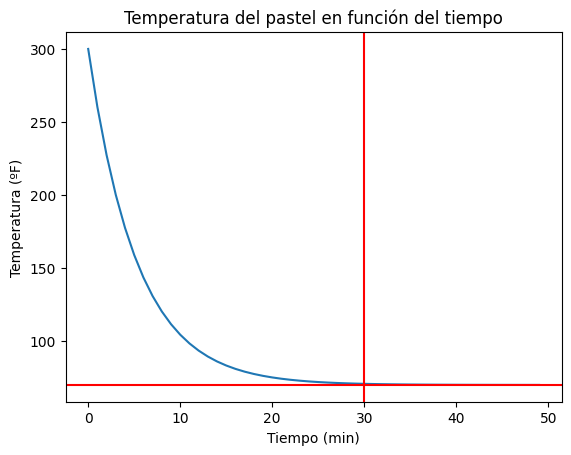

In [ ]:
#Elaboración del gráfico
x=np.arange(0, 50)
y=230*np.exp(round(k, 2)*(x))+70

plt.plot(x, y)
plt.title('Temperatura del pastel en función del tiempo')
plt.xlabel('Tiempo (min)')
plt.ylabel('Temperatura (ºF)')
plt.axhline(70, color='r')
plt.axvline(30, color='r')
plt.show()

Solución 1: [1.1 1. ]
Solución 2: [1.64093007 1.97920045]


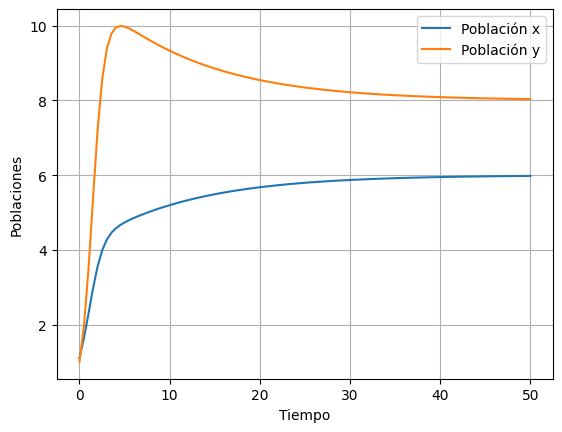

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#Definición de las ecuaciones diferenciales
def modelo_competencia(z, t, k1, k2, k3, k4):
  dxdt=z[0]-k1*z[0]**2-k2*z[0]*z[1]
  dydt=k3*z[1]-k1*z[1]**2-k4*z[0]*z[1]
  return [dxdt, dydt]

#Parámetros
k1=0.1
k2=0.05
k3=1.7
k4=0.15

#Condiciones iniciales
x0=1.1
y0=1
z0=[x0, y0]

#Tiempo de integración
t=np.linspace(0, 50, 100) #Años

#Resolución de las ecuaciones diferenciales
solucion=odeint(modelo_competencia, z0, t, args=(k1, k2, k3, k4))
print(f"Solución 1: {solucion[0]}")
print(f"Solución 2: {solucion[1]}")

#Graficación de resultados
plt.plot(t, solucion[:, 0], label='Población x')
plt.plot(t, solucion[:, 1], label='Población y')
plt.xlabel('Tiempo')
plt.ylabel('Poblaciones')
plt.legend()
plt.grid(True)
plt.show()

Solución 1: [ 4. 10.]
Solución 2: [ 4.16760373 10.34415999]


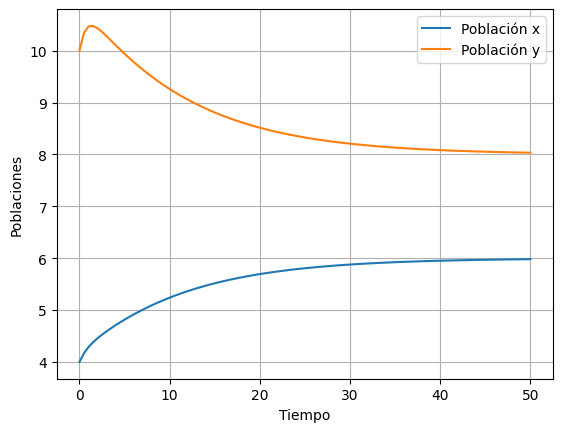

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#Definición de las ecuaciones diferenciales
def modelo_competencia(z, t, k1, k2, k3, k4):
  dxdt=z[0]-k1*z[0]**2-k2*z[0]*z[1]
  dydt=k3*z[1]-k1*z[1]**2-k4*z[0]*z[1]
  return [dxdt, dydt]

#Parámetros
k1=0.1
k2=0.05
k3=1.7
k4=0.15

#Condiciones iniciales
x0=4
y0=10
z0=[x0, y0]

#Tiempo de integración
t=np.linspace(0, 50, 100) #Años

#Resolución de las ecuaciones diferenciales
solucion=odeint(modelo_competencia, z0, t, args=(k1, k2, k3, k4))
print(f"Solución 1: {solucion[0]}")
print(f"Solución 2: {solucion[1]}")

#Graficación de resultados
plt.plot(t, solucion[:, 0], label='Población x')
plt.plot(t, solucion[:, 1], label='Población y')
plt.xlabel('Tiempo')
plt.ylabel('Poblaciones')
plt.legend()
plt.grid(True)
plt.show()